Текст дз:
Проанализировать данные по выживаемости. Обучить модель предсказания выживет ли человек или нет (ключевая переменная) (различные варианты визуализации можно посмотреть здесь https://www.kaggle.com/competitions/titanic/code?competitionId=3136&sortBy=scoreDescending&language=Python).
Определить наиболее значимые переменные которые влияют на выживаемость. 
Визуализировать дерево решений. 
Написать вывод. 
Не копировать бездумно чужие работы. 


Ответить на вопросы (обоснованно).

1. Как влияет размер семьи  на вероятность виживаемости (одинокие выживают чаще или нет?, люди у которых большая семья (больше 4) выживают чаще или нет).
2. Как влияет пол/возраст/номер палубы. 

In [123]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # импорты
import sklearn
import matplotlib.pyplot as plt

In [124]:
train_df = pd.read_csv('titanic_train.csv')
train_df.head() # загрузка датасета и первые пять колонок

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
train_df['Embarked'].dropna(inplace=True) # удаление пустых ячеек

In [127]:
women = train_df.loc[train_df['Sex'] == 'female']["Survived"]
rate_women = sum(women)/len(women) # расчет процента выживших
rate_women  # Как мы узнали, почти 75 процентов выживали

0.7420382165605095

In [128]:
men = train_df.loc[train_df['Sex'] == 'male']["Survived"]
rate_men = sum(men) / len(men) # снова расчет процента выживших
rate_men # Только 19 процентов мужчин выжило

0.18890814558058924

In [129]:
train_df['Sex'] = train_df['Sex'].apply(lambda sex: 1 if sex == 'male' else 0) # замена пола на 1 и 0

In [130]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']
train_df['IsAlone'] = train_df['FamilySize'].apply(lambda num: 1 if num == 0 else 0)
train_df['MoreThan4Members'] = train_df['FamilySize'].apply(lambda num: 1 if num > 4 else 0) # добавление новых колонок

In [131]:
alone = train_df.loc[train_df['IsAlone'] == True]['Survived']
morethan4 = train_df.loc[train_df['MoreThan4Members'] == True]['Survived']
percent_alone = sum(alone) / len(alone) * 100
percent_mtf = sum(morethan4) / len(morethan4) * 100 # расчеты выживших одиноких и тех у кого на борту более 4 членов семьи

In [155]:
print(f'Одинокие выжившие - {round(percent_alone,1)}%')
print(f'Более 4 членов семьи выжившие - {round(percent_mtf,1)}%') # как вывод, люди которые были одни, выживали чаще, чем у кого более 4 человек

Одинокие выжившие - 30.4%
Более 4 членов семьи выжившие - 14.9%


In [134]:
first = train_df.loc[train_df['Pclass'] == 1]['Survived']
second = train_df.loc[train_df['Pclass'] == 2]['Survived'] # разделение на классы по классу кабины
third = train_df.loc[train_df['Pclass'] == 3]['Survived']

In [135]:
rate_first = sum(first) / len(first)
rate_second = sum(second) / len(second) # тоже расчеты процента выживших в каждой кабине
rate_third = sum(third) / len(third)

In [136]:
print(f'В первом классе выжило: {round(rate_first,1)*100}%, во втором: {round(rate_second, 1)*100}% и в третьем: {round(rate_third,1)*100}%')
# Видим, что реже всего выживали в 3 классе, а чаще в первом

В первом классе выжило: 60.0%, во втором: 50.0% и в третьем: 20.0%


In [156]:
encoder = LabelEncoder()
train_df['Cabin'] = encoder.fit_transform(train_df['Cabin'])
train_df['Embarked'] = encoder.fit_transform(train_df['Cabin'])
# создание кодировщика и кодировка двух колонок для работы с ними

In [138]:
X_train = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1) # отделяем ненужные колонки и записываем датафрейм в икс


In [139]:
X_train.head() # вывели x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,MoreThan4Members
0,3,1,22.0,1,0,7.2500,147,147,1,0,0
1,1,0,38.0,1,0,71.2833,81,81,1,0,0
2,3,0,26.0,0,0,7.9250,147,147,0,1,0
3,1,0,35.0,1,0,53.1000,55,55,1,0,0
4,3,1,35.0,0,0,8.0500,147,147,0,1,0


In [140]:
y_train = train_df['Survived'] # запись целевой переменной

In [141]:
y_train # вывели целевую переменную

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [142]:
test_df = pd.read_csv('titanic_test.csv') # загрузка тестовой выборки

In [143]:
test_df['Sex'] = test_df['Sex'].apply(lambda sex: 1 if sex == 'male' else 0)
test_df['Cabin'] = encoder.fit_transform(test_df['Cabin']) # те же преобразования что были выше только для тестовой выборки
test_df['Embarked'] = encoder.fit_transform(test_df['Cabin'])

In [144]:
test_df['FamilySize'] = test_df['SibSp'] + train_df['Parch'] 
test_df['IsAlone'] = test_df['FamilySize'].apply(lambda num: 1 if num == 0 else 0) # преобразования
test_df['MoreThan4Members'] = test_df['FamilySize'].apply(lambda num: 1 if num > 4 else 0)

In [145]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True) # заливка нан данных в столбце age

In [146]:
test_df.head() # проверяем датафрейм

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,MoreThan4Members
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,76,76,0.0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,76,76,1.0,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,76,76,0.0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,76,76,0.0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,76,76,1.0,0,0


In [147]:
X_test = test_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1) # тоже отделяем ненужные столбцы

In [148]:
X_test # вывод

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,IsAlone,MoreThan4Members
0,3,1,34.50000,0,0,7.8292,76,76,0.0,1,0
1,3,0,47.00000,1,0,7.0000,76,76,1.0,0,0
2,2,1,62.00000,0,0,9.6875,76,76,0.0,1,0
3,3,1,27.00000,0,0,8.6625,76,76,0.0,1,0
4,3,0,22.00000,1,1,12.2875,76,76,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,76,76,0.0,1,0
414,1,0,39.00000,0,0,108.9000,22,22,0.0,1,0
415,3,1,38.50000,0,0,7.2500,76,76,0.0,1,0
416,3,1,30.27259,0,0,8.0500,76,76,1.0,0,0


In [149]:
from sklearn.model_selection import GridSearchCV # импорт 

In [159]:
grid = {'max_depth': list(range(3,15))}
grid_search = GridSearchCV(DecisionTreeClassifier(), grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_ # создание экземпляра поиска по сетке и нахождение лучшего параметра

{'max_depth': 7}

In [151]:
clf = DecisionTreeClassifier(max_depth=7) # создание дерева решений с лучшим параметром
clf.fit(X_train, y_train) # обучение

DecisionTreeClassifier(max_depth=7)

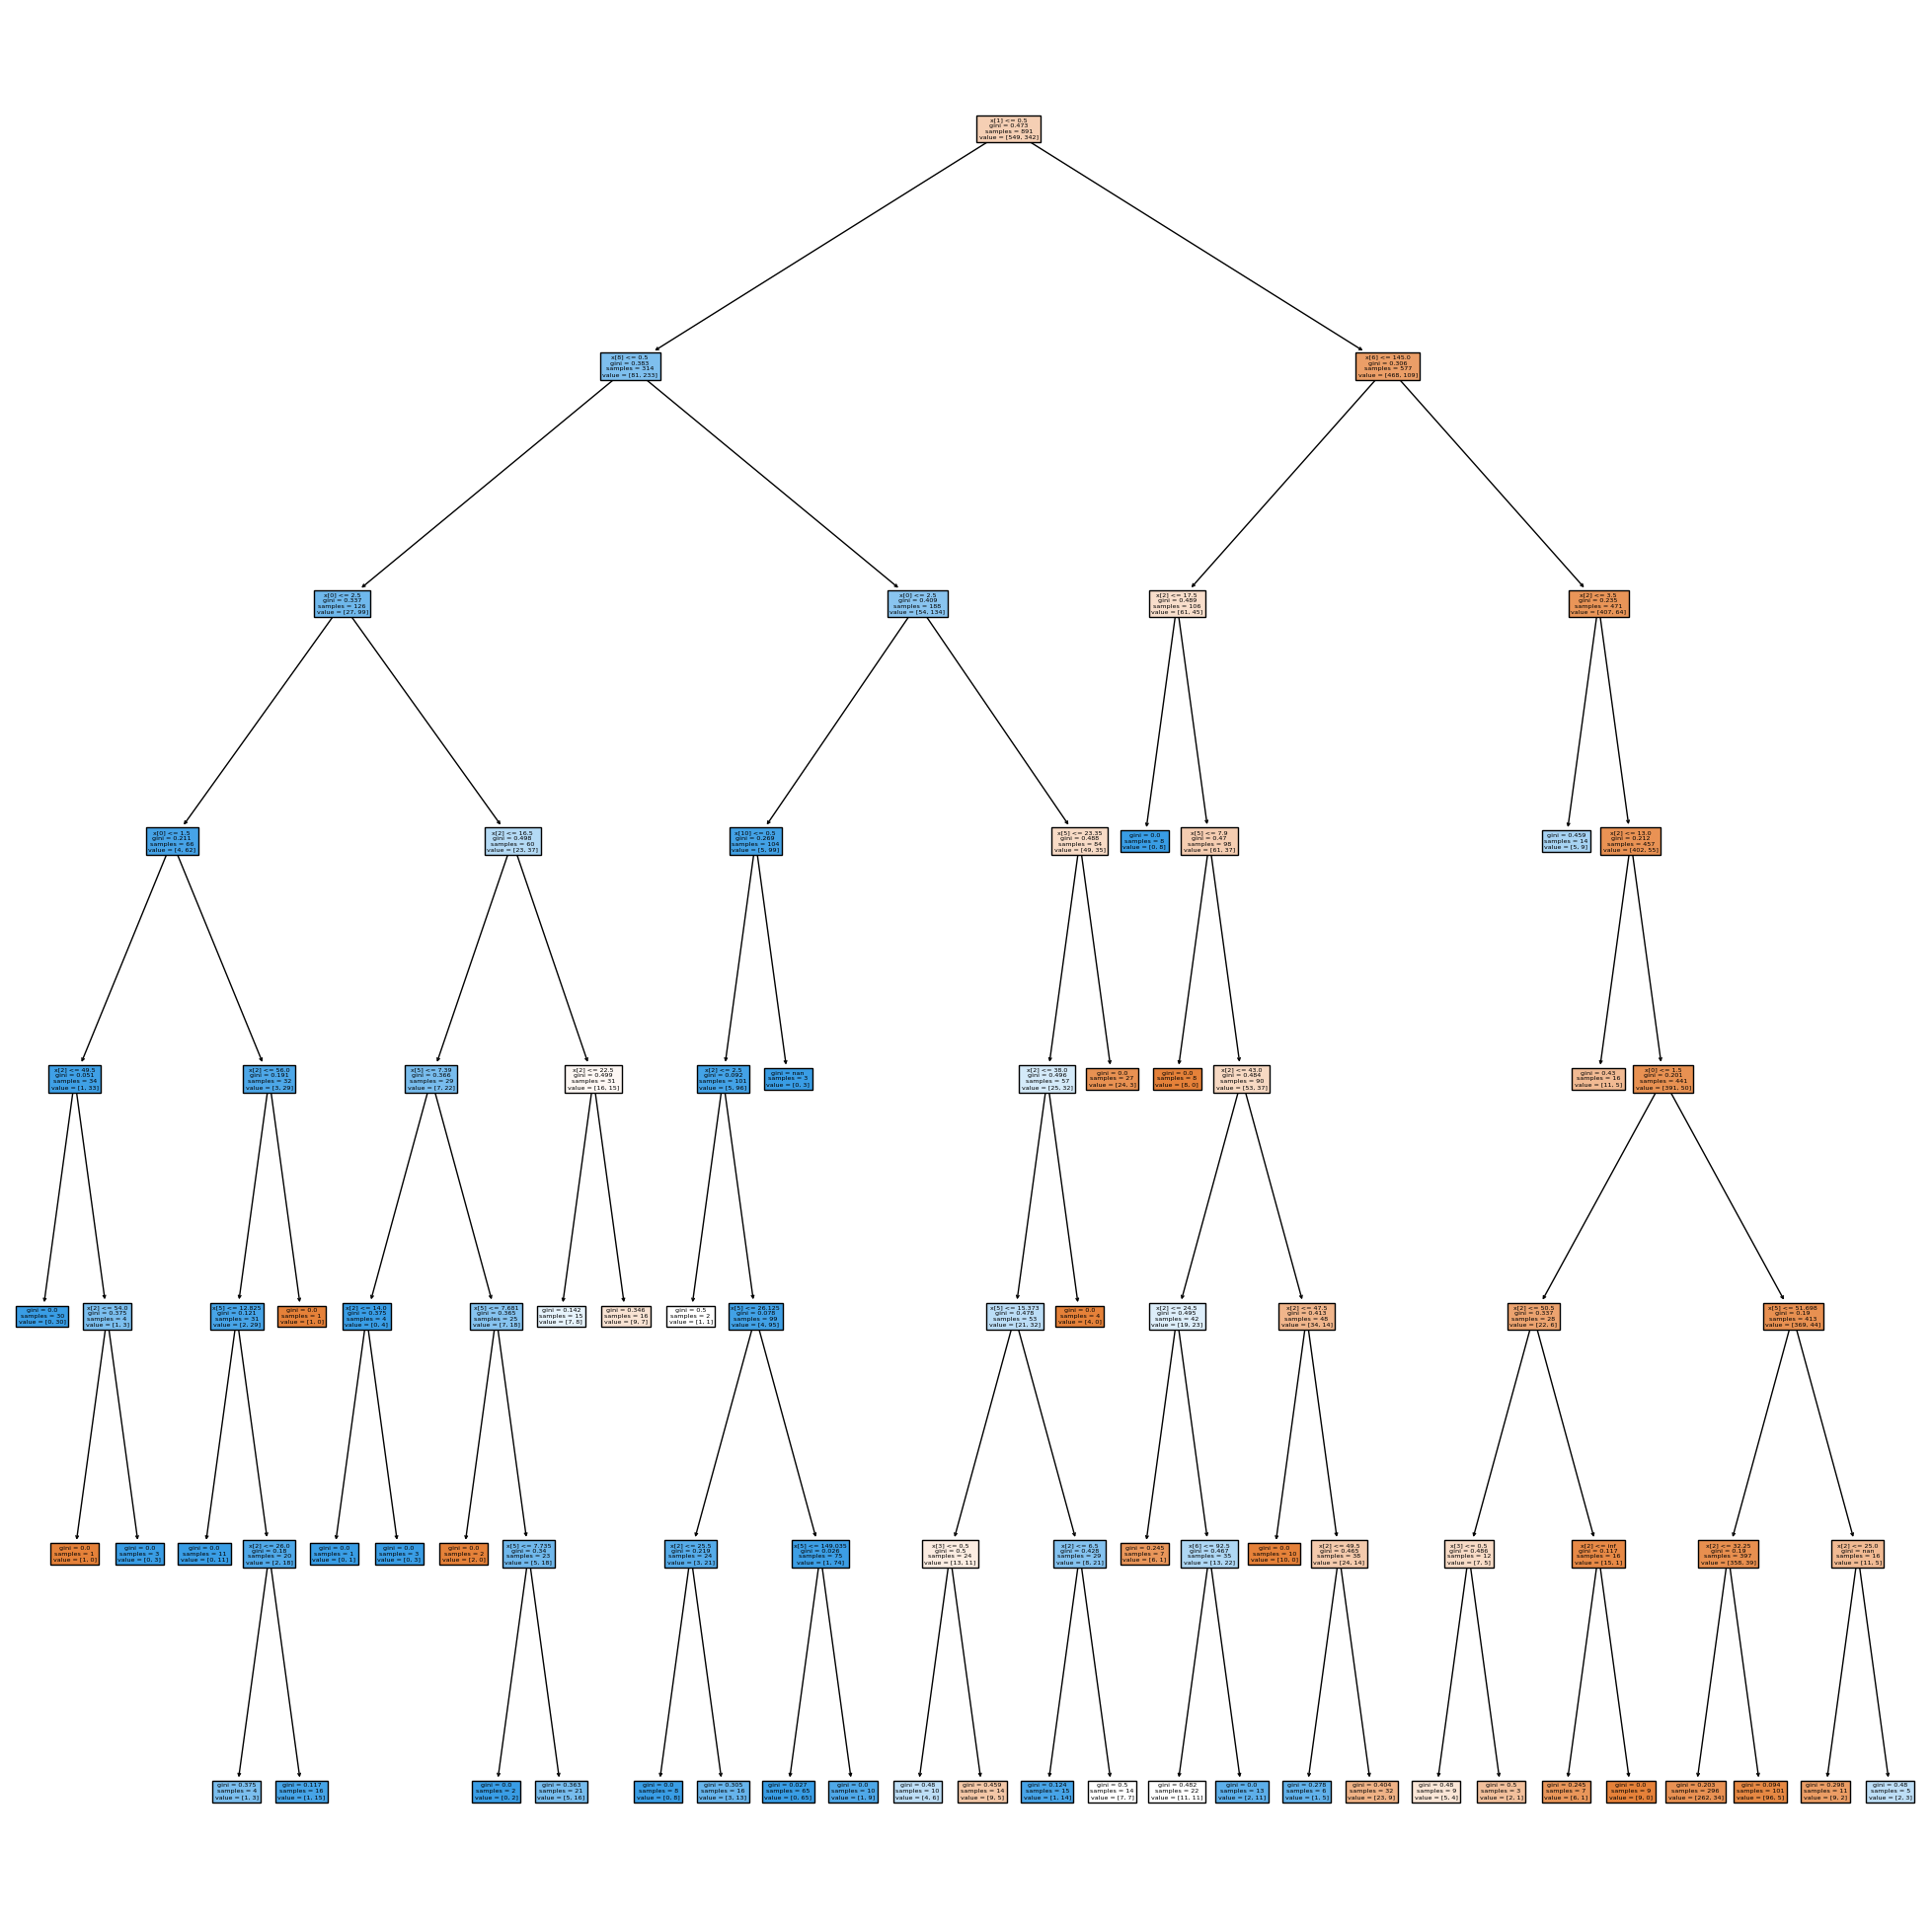

In [160]:
fig, ax = plt.subplots(figsize=(25, 25))
sklearn.tree.plot_tree(clf,filled=True, ax=ax) # визуализация
plt.show()


Вывод: 1. Как оказалось одинокие люди (одни на борту) выживали чаще, чем те, кто был с 5 и более членами семьи
2. Мужчины выживали меньше гораздо реще, чем женщины (19% и 75%), в 3 классе кабины выживали реще чем в 1 и 2, (В первом классе выжило: 60.0%, во втором: 50.0% и в третьем: 20.0%)
Все это доказано расчетами выше

